In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.3.0
TFP version: 0.11.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [3]:
# Create a normal distribution from Tensorflow Distributions

normal = tfd.Normal(loc=10, scale=4)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [4]:
# Sample from the chosen distribution...

normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=6.4076653>

In [5]:
# ... or sample multiple times

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11.355018 , 11.379945 ,  7.357686 ,  8.858003 , 11.754095 ,
       13.315426 ,  7.8563375,  7.858607 ,  5.870301 , -1.7708197],
      dtype=float32)>

In [6]:
# Obtain value of probability's density

normal.prob(13.4152)

<tf.Tensor: shape=(), dtype=float32, numpy=0.06927161>

In [7]:
# Obtain value of logprobability

normal.log_prob(13.4152)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.6697202>

In [8]:
# Verify that this really is the log of the probability

np.log(normal.prob(13.4152))

-2.6697202

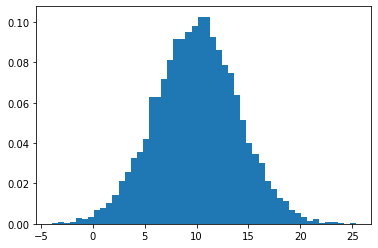

In [9]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

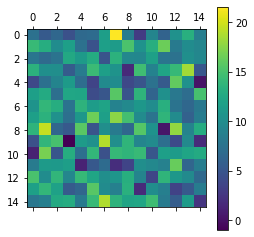

In [10]:
# Plot the Matrix

plt.matshow(normal.sample(sample_shape=(15, 15)))
plt.colorbar()
plt.show()

In [11]:
# Do the same for the exponential distribution

exp = tfd.Exponential(rate=6)
exp

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

In [12]:
# Sample as before

exp.sample(sample_shape=(6, 4))

<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.0529936 , 0.15993091, 0.10317847, 0.22897662],
       [0.2799482 , 0.06690476, 0.28050256, 0.29823667],
       [0.06354411, 0.0921399 , 0.10159799, 0.01197598],
       [0.01607682, 0.532871  , 0.0201003 , 0.08589926],
       [0.09749139, 0.15851445, 0.06773803, 0.02495367],
       [0.08963371, 0.02319466, 0.02452011, 0.03186161]], dtype=float32)>

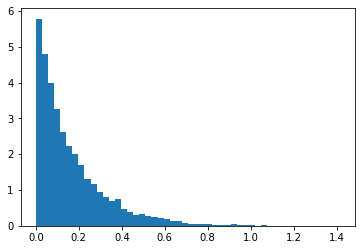

In [13]:
# Plot a histogram, approximating the density

plt.hist(exp.sample(10000), bins=50, density=True)
plt.show()

In [14]:
# Create a Bernoulli distribution (discrete)

bern = tfd.Bernoulli(probs=0.2341)
bern

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [15]:
bern.sample(sample_shape=(10,10))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int32)>

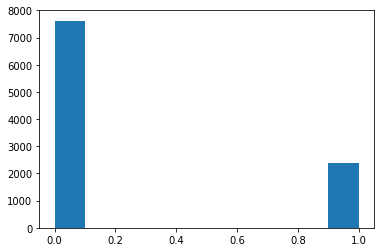

In [16]:
# Plot a histogram, approximating the density

plt.hist(bern.sample(10000))
plt.show()

#### A word of caution on discrete distributions

In [17]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {:0.8f} '.format(k, bern.prob(k)))

prob result 0 for k = 0.76590002 
prob result 0.5 for k = 0.42343497 
prob result 1 for k = 0.23410000 
prob result -1 for k = 2.50577879 


In [18]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_sucess, k):
    return np.power(p_sucess,k)*np.power((1-p_sucess),(1-k))

In [19]:
# Evaluate it as before

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {:.8f} '.format(k, my_bernoulli(0.2341, k)))

prob result 0 for k = 0.76590000 
prob result 0.5 for k = 0.42343499 
prob result 1 for k = 0.23410000 
prob result -1 for k = 2.50577877 


#### Work with batch distributions

In [20]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [21]:
# Sample from it, noting the shape

bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=int32)>

In [22]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [23]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(2)

<tf.Tensor: shape=(2, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 0],
         [1, 0],
         [1, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]]], dtype=int32)>

In [24]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [25]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

normal_diag = tfd.MultivariateNormalDiag( loc=[0, 1], scale_diag=[1, 2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [26]:
# Sample from it

normal_diag.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.8012545 ,  3.0774972 ],
       [ 0.26332977, -1.128108  ],
       [-2.7921855 ,  1.6095757 ],
       [ 0.9923561 ,  0.16231078],
       [-0.54473287,  0.02216691]], dtype=float32)>

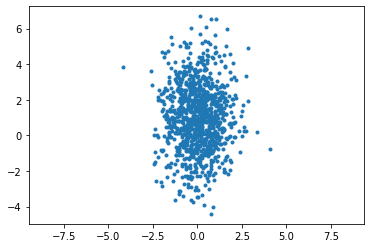

In [27]:
# Make a plot

plt_sample = normal_diag.sample(1000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=1)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [28]:
# Create three "batches" of multivariate normals

normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0, 1],[4, 2],[1, 4]], scale_diag=[[1, 2],[4, 1],[3,5]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [29]:
# Sample from it

samples = normal_diag_batch.sample(4)
samples

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ -0.9684915 ,   3.147423  ],
        [ 11.72461   ,   0.7251111 ],
        [ -4.4904838 ,   6.636808  ]],

       [[  0.69889575,  -1.9444196 ],
        [  5.6302743 ,   3.3957233 ],
        [  6.327678  , -10.6260395 ]],

       [[  0.8734188 ,   0.96283925],
        [  9.876235  ,   2.619074  ],
        [  1.6428888 ,   4.901674  ]],

       [[ -1.1454769 ,  -2.4976373 ],
        [  2.920927  ,   2.1881227 ],
        [  3.6751103 ,   9.198647  ]]], dtype=float32)>

In [30]:
# Compute log probs

normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ -3.5764403,  -5.9015174,  -6.359728 ],
       [ -3.8589525,  -4.2812495, -10.401245 ],
       [ -2.9126272,  -4.4948645,  -4.585149 ],
       [ -4.716266 ,  -3.278254 ,  -5.484013 ]], dtype=float32)>

In [31]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = normal_diag_batch.sample(1000)
plt_sample_batch.shape

TensorShape([1000, 3, 2])

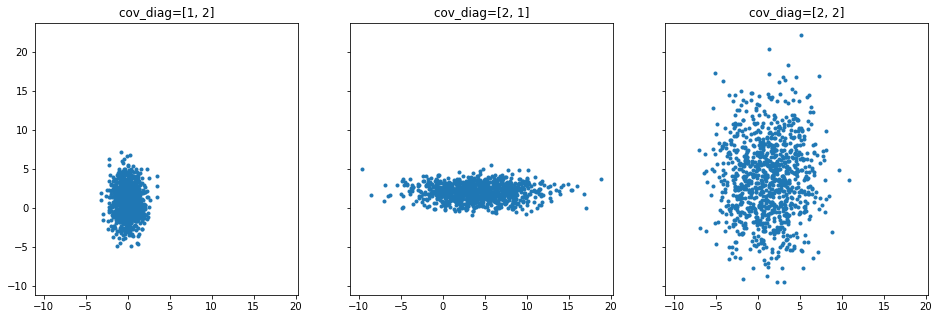

In [32]:
# Plot samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 5)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=1)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [33]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components

locs = [1.0, -1.0]
scales = [0.5, 1.5]

batch_of_normals = tfd.Normal(loc=locs, scale=scales)

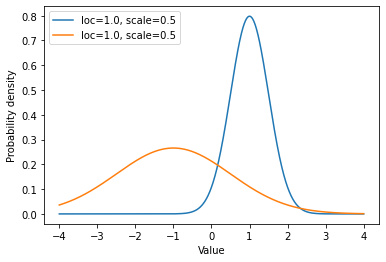

In [34]:
# Univariate density functions

import seaborn as sns

t = np.linspace(-4, 4, 1000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(x=t, y=densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(x=t, y=densities[:, 1], label='loc={}, scale={}'.format(locs[0], scales[0]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [35]:
# Check their batch_shape and event_shape

batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [36]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_Independent = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=1)

In [37]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

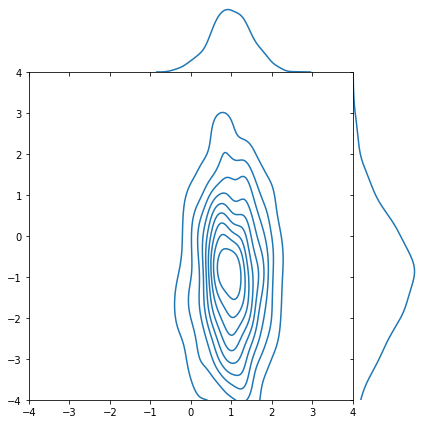

In [38]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_Independent.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x=x1, y=x2, kind="kde", space=0, xlim=[-4, 4], ylim=[-4, 4])

In [39]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)

bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales)

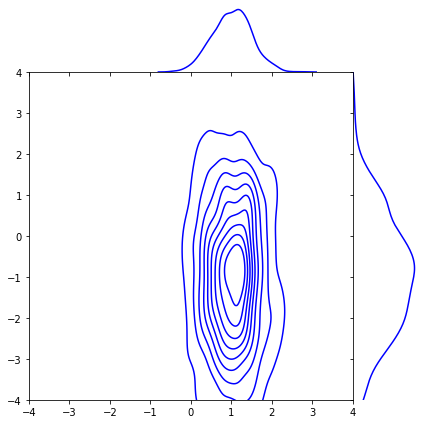

In [40]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x=x1, y=x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [41]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [42]:
# Highlight batch_shape

normals_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [43]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

normals_batch_3_event_2 = tfd.Independent(normals_batch_3by2_event_1, reinterpreted_batch_ndims=1)
normals_batch_3_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [44]:
# Evaluate log_prob

normals_batch_3_event_2.log_prob(np.random.randn(3, 2))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-5.0318940e+03, -5.0771250e+03, -3.1128523e+00], dtype=float32)>

In [45]:
# Can reinterpret _all_ batch dimensions as event dimensions

normals_batch_1_event_3by2 = tfd.Independent(normals_batch_3by2_event_1, reinterpreted_batch_ndims=2)
normals_batch_1_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [46]:
# Take log_probs 

normals_batch_1_event_3by2.log_prob(np.random.randn(3, 2))

<tf.Tensor: shape=(), dtype=float32, numpy=-10195.772>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [47]:
# Run this cell to downlaod the data

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm',
                                    dest_path='/content/20_Newsgroup_Data.zip',
                                    unzip=True, 
                                    showsize=True)

In [48]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Get the train data

newsgroup_data = fetch_20newsgroups(data_home="/content/20_Newsgroup_Data/", subset="train")

In [50]:
# More information about the data set

print(newsgroup_data["DESCR"])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [51]:
# Example article

print(newsgroup_data["data"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [52]:
newsgroup_data.keys()

dict_keys(['target', 'filenames', 'DESCR', 'data', 'target_names'])

In [53]:
# Associated label and its Name

print(newsgroup_data["target_names"][newsgroup_data["target"][0]])

rec.autos


In [54]:
# Preprocessing boilerplate

n_documents = len(newsgroup_data['data'])

count_vectorizer = CountVectorizer(input='content', 
                                   binary=True,
                                   max_df=0.25, 
                                   min_df=1.01/n_documents) # ignore common words, words that appear once
                                   
binary_bag_of_words = count_vectorizer.fit_transform(newsgroup_data['data']) # input is a list of strings

In [55]:
# Check shape

binary_bag_of_words.shape

(11314, 56365)

In [56]:
# Check that the fit has been successful

count_vectorizer.inverse_transform(binary_bag_of_words[np.random.randint(0, binary_bag_of_words.shape[0])])

[array(['college', 'called', 'please', 'il', 'two', '36', 'new', 'than',
        'into', 'maybe', 'does', 'anybody', 'got', 'people', 'use', 'its',
        've', 'might', 'post', 'time', 'dangerous', 'truth', 'points',
        'jonathan', '23', 'am', 'error', 'yes', 'already', 'things',
        'because', 'see', 'many', 'these', 'keep', 'say', 'his', 'course',
        'he', 'means', 'putting', 'read', 'show', '1993', 'been', 'love',
        'such', 'both', 'think', 'going', 'being', 'something', '13',
        'therefore', 'david', 'freenet', 'god', 'mind', 'cleveland',
        'based', 'environment', 'complete', 'save', 'emphasis', 'group',
        'light', 'give', 'important', 'turned', 'possible', 'least',
        'gary', 'while', 'service', 'care', 'apr', 'wheaton', 'hayward',
        'pantheism', 'environmentalism', '46', '31', 'athos', 'rutgers',
        'by028', 'cavano', 'covered', 'current', 'unintentionally',
        'adamantly', 'environmentalist', 'styrofoam', 'table', 'wish

In [57]:
# Dict that will be useful later 

inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [58]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroup_data['target'].max() + 1
y = newsgroup_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [59]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroup_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [60]:
# Define a distribution for each class

batch_of_bernoulli = tfd.Bernoulli(probs=theta)
p_x_given_y = tfd.Independent(batch_of_bernoulli, 
                              reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [61]:
# Take a sample of words from each class

n_samples = 2
sample = p_x_given_y.sample(n_samples)
sample.shape

TensorShape([2, 20, 56365])

In [62]:
# Choose a class

chosen_class = 0
newsgroup_data['target_names'][chosen_class]

'alt.atheism'

In [63]:
# Indicators for words that appear in the sample

class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(2, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [64]:
# Perform inverse transform to test quality of fit

count_vectorizer.inverse_transform(class_sample)

[array(['10', 'acceptance', 'after', 'again', 'agree', 'almost', 'also',
        'animals', 'ans', 'apart', 'atheist', 'back', 'beauchaine', 'beef',
        'been', 'benedikt', 'best', 'bit', 'bmd', 'captured', 'case',
        'caste', 'christian', 'claim', 'cleared', 'communist', 'complete',
        'concentrate', 'counterexamples', 'crime', 'cs', 'decent',
        'decision', 'depends', 'desire', 'didn', 'direct', 'dispute',
        'does', 'doubt', 'ever', 'executed', 'falls', 'few', 'find',
        'focusses', 'found', 'giving', 'guessed', 'having', 'he', 'higher',
        'idea', 'intimidate', 'into', 'isn', 'jon', 'kl5', 'language',
        'large', 'left', 'life', 'listen', 'll', 'lous', 'makes', 'making',
        'mantis', 'many', 'massachvsetts', 'meaning', 'mechanisms', 'men',
        'meta', 'monu6', 'morality', 'morrow', 'natural', 'necessary',
        'neighbor', 'neither', 'omnipotence', 'opinions', 'original',
        'particularly', 'pasadena', 'placed', 'please', 'po',

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [65]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [66]:
# Sample

normal_distributions.sample(1)

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-0.9324864, -2.2361264],
        [ 2.8341866,  3.8173757],
        [-7.4557624,  1.7681338]]], dtype=float32)>

In [67]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [68]:
# Use independent to move part of the batch shape

ind_normal_distributions = tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [69]:
# Draw some samples

ind_normal_distributions.sample(1)

<tf.Tensor: shape=(1, 2, 2, 3), dtype=float32, numpy=
array([[[[ 0.12300298,  1.5454546 ,  0.53250986],
         [ 0.7420459 ,  0.82388216,  2.9321582 ]],

        [[ 2.0339656 ,  2.4824092 ,  8.647506  ],
         [ 0.8274071 , -0.31896806,  2.411996  ]]]], dtype=float32)>

In [70]:
# `[B, E]` shaped input

inp = tf.random.uniform((2,2,3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -8.763502, -74.403946], dtype=float32)>

In [71]:
# `[E]` shaped input (broadcasting over batch size)

inp = tf.random.uniform((2,3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -8.653174, -61.64972 ], dtype=float32)>

In [72]:
#`[S, B, E]` shaped input (broadcasting over samples)

inp = tf.random.uniform((4, 2, 2,3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-10.794763, -68.63214 ],
       [-10.893665, -67.253334],
       [ -9.167491, -65.42946 ],
       [-13.037825, -73.98786 ]], dtype=float32)>

In [73]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]

inp = tf.random.uniform((4, 1, 2, 1))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-10.160808, -62.99887 ],
       [-10.236177, -81.878876],
       [ -9.600963, -61.198227],
       [-11.7948  , -66.08545 ]], dtype=float32)>

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [74]:
# Run this cell to downlaod the data

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm',
                                    dest_path='/content/20_Newsgroup_Data.zip',
                                    unzip=True, 
                                    showsize=True)

In [75]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [77]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_test_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  \
    (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

In [78]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes, smooth_factor):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = smooth_factor # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [79]:
# Getting a subset of the 20 newsgroup dataset

c_count = 4
categories = np.random.choice(newsgroup_data["target_names"], c_count)
print(categories)

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories), smooth_factor=1)

['sci.crypt' 'soc.religion.christian' 'comp.windows.x'
 'rec.sport.baseball']


To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [80]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [81]:
# Run the function 

priors = class_priors(len(categories), train_labels)

The class priors are [0.24874161 0.25041946 0.24958054 0.25125839]


In [82]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distribution(probs):
    batch_of_bernoulli = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoulli, 
                           reinterpreted_batch_ndims=1)

    return dist

tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[19482] dtype=int32>

In [83]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_probs = joint_likelihood - norm_factor

    return log_probs

#### Computing log_probs

In [84]:
# Predicting one example from our test data

log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([  0.      , -54.623566, -74.387024, -73.9176  ], dtype=float32)>

In [85]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('F1 Score: ', f1_score(test_labels, predicted_classes, average='macro'))
print('Precision Score: ', precision_score(test_labels, predicted_classes, average='macro', zero_division=0))
print('Recall Score: ', recall_score(test_labels, predicted_classes, average='macro'))
print('Confsion Metrix: \n', confusion_matrix(test_labels, predicted_classes))

F1 Score:  0.911345133298529
Precision Score:  0.9227763531323123
Recall Score:  0.9117953274472527
Confsion Metrix: 
 [[388   4   3   0]
 [  1 395   0   1]
 [ 52  19 324   1]
 [ 22  37   0 339]]


In [86]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('F1 Score: ', f1_score(test_labels, pred, average='macro'))
print('Precision Score: ', precision_score(test_labels, pred, average='macro', zero_division=0))
print('Recall Score: ', recall_score(test_labels, pred, average='macro'))
print('Confsion Metrix: \n', confusion_matrix(test_labels, pred))

F1 Score:  0.911345133298529
Precision Score:  0.9227763531323123
Recall Score:  0.9117953274472527
Confsion Metrix: 
 [[388   4   3   0]
 [  1 395   0   1]
 [ 52  19 324   1]
 [ 22  37   0 339]]


In [87]:
# The result of the model that we ahve craeted and the inbuld skelarn model is same.
# Hence we can say that out model, works fine.
# To Improve result we can reduce the smooothing factor.

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories), smooth_factor=1e-20)
priors = class_priors(len(categories), train_labels)
tf_dist = make_distribution(smoothed_counts)

# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('F1 Score: ', f1_score(test_labels, predicted_classes, average='macro'))
print('Precision Score: ', precision_score(test_labels, predicted_classes, average='macro', zero_division=0))
print('Recall Score: ', recall_score(test_labels, predicted_classes, average='macro'))
print('Confsion Metrix: \n', confusion_matrix(test_labels, predicted_classes))

The class priors are [0.24874161 0.25041946 0.24958054 0.25125839]
F1 Score:  0.9628307210697791
Precision Score:  0.9631361448518616
Recall Score:  0.9627681862812475
Confsion Metrix: 
 [[373   3  18   1]
 [  2 381   8   6]
 [  9   4 383   0]
 [  5   1   2 390]]


***
<a id='trainable_distributions'></a>
## Trainable Distributions

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [88]:
# Run this cell to downlaod the data

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm',
                                    dest_path='/content/20_Newsgroup_Data.zip',
                                    unzip=True, 
                                    showsize=True)

In [89]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [90]:
# Define an exponential distribution

exponential = tfd.Exponential(rate=0.3)
exponential

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

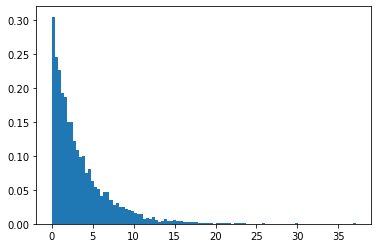

In [91]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [92]:
# Define the negative log likelihood

def NegativeLogLikelihood(data, dist):
    return -tf.reduce_mean(dist.log_prob(data))

In [93]:
# Define a function to compute the loss and gradients

@tf.function
def ENGINE(data, distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss = NegativeLogLikelihood(data, distribution)
        grads = tape.gradient(loss, distribution.trainable_variables)
    return loss, grads

In [94]:
# Optimize

def exponential_dist_optimisation(data, distribution, epochs):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1)

    for i in range(epochs):
        loss, grads = ENGINE(data, distribution)
        optimizer.apply_gradients(zip(grads, distribution.trainable_variables))

        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        
        print("Step {:03d}: Loss: {:.6f}: Rate: {:.6f}".format(i+1, loss, rate_value))
        

    return train_loss_results, train_rate_results

In [95]:
# Define an exponential distribution with a trainable rate parameter

exp_train = tfd.Exponential(rate=tf.Variable(initial_value=5.0, trainable=True, name="exp_train"))
exp_train.trainable_variables

(<tf.Variable 'exp_train:0' shape=() dtype=float32, numpy=5.0>,)

In [96]:
# Get some data and train

sample_data = exponential.sample(10000)

train_loss_results, train_rate_results = exponential_dist_optimisation(sample_data, exp_train, epochs=40)

Step 001: Loss: 14.769032: Rate: 4.000001
Step 002: Loss: 11.716485: Rate: 3.000466
Step 003: Loss: 8.729841: Rate: 2.002172
Step 004: Loss: 5.864270: Rate: 1.007286
Step 005: Loss: 3.292301: Rate: 0.026274
Step 006: Loss: 3.725250: Rate: 0.388596
Step 007: Loss: 2.218137: Rate: 0.694889
Step 008: Loss: 2.640247: Rate: 0.938802
Step 009: Loss: 3.138379: Rate: 1.124414
Step 010: Loss: 3.565974: Rate: 1.257120
Step 011: Loss: 3.889117: Rate: 1.342131
Step 012: Loss: 4.102152: Rate: 1.384181
Step 013: Loss: 4.209046: Rate: 1.387525
Step 014: Loss: 4.217587: Rate: 1.356004
Step 015: Loss: 4.137313: Rate: 1.293140
Step 016: Loss: 3.978858: Rate: 1.202230
Step 017: Loss: 3.753959: Rate: 1.086464
Step 018: Loss: 3.475997: Rate: 0.949075
Step 019: Loss: 3.161147: Rate: 0.793560
Step 020: Loss: 2.830687: Rate: 0.624089
Step 021: Loss: 2.515786: Rate: 0.446359
Step 022: Loss: 2.268768: Rate: 0.269828
Step 023: Loss: 2.193845: Rate: 0.115339
Step 024: Loss: 2.537696: Rate: 0.054378
Step 025: Loss

In [97]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.3
Pred rate:   0.14212404


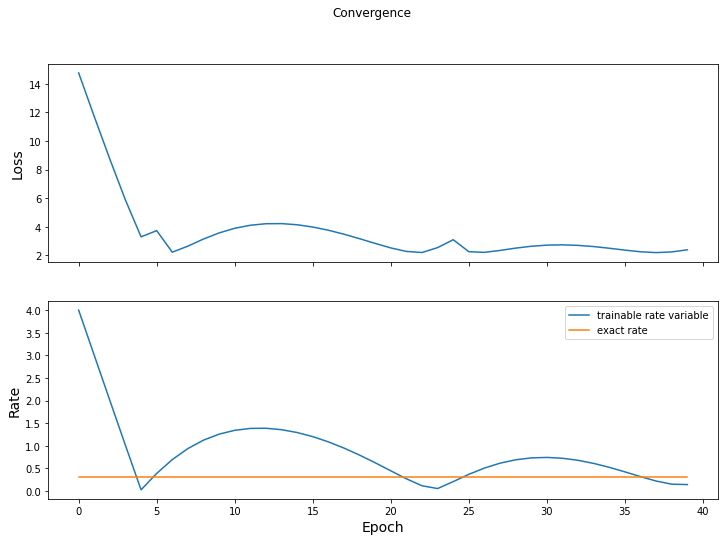

In [98]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [99]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_test_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [100]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes, alpha):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = alpha # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [101]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [102]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [103]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [104]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            loss, grads = ENGINE(class_data[c_num], distributions[c_num])
            if i%10 == 0:
                print("Step {:03d}: Loss: {:.6f} ".format(i+1, loss))
            optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))

            # Constraint on Trainable Varaibles.
            eta = 1e-3
            clipped_probs = tf.clip_by_value(distributions[c_num].trainable_variables, eta, 1)
            train_vars[c_num] = tf.squeeze(clipped_probs)


    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [105]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories), alpha=1e-4)

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [106]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
Step 001: Loss: 0.078488 
Step 011: Loss: 0.069109 
Step 021: Loss: 0.060383 
Step 031: Loss: 0.052305 
Step 041: Loss: 0.044830 
Step 051: Loss: 0.037911 
Step 061: Loss: 0.031512 
Step 071: Loss: 0.025602 
Step 081: Loss: 0.020136 
Step 091: Loss: 0.015050 

%-------------------%
Class  1
%-------------------%
Step 001: Loss: 0.071539 
Step 011: Loss: 0.062211 
Step 021: Loss: 0.053434 
Step 031: Loss: 0.045280 
Step 041: Loss: 0.037721 
Step 051: Loss: 0.030721 
Step 061: Loss: 0.024250 
Step 071: Loss: 0.018277 
Step 081: Loss: 0.012771 
Step 091: Loss: 0.007670 

%-------------------%
Class  2
%-------------------%
Step 001: Loss: 0.078598 
Step 011: Loss: 0.069507 
Step 021: Loss: 0.061111 
Step 031: Loss: 0.053455 
Step 041: Loss: 0.046486 
Step 051: Loss: 0.040169 
Step 061: Loss: 0.034472 
Step 071: Loss: 0.029345 
Step 081: Loss: 0.024748 
Step 091: Loss: 0.020607 

%-------------------%
Class  3
%-------------------%
Step

In [107]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('- F1 Score: ', f1_score(test_labels, predicted_classes, average='macro'))
    print('- Precision Score: ', precision_score(test_labels, predicted_classes, average='macro', zero_division=0))
    print('- Recall Score: ', recall_score(test_labels, predicted_classes, average='macro'))
    print('- Confsion Metrix: \n', confusion_matrix(test_labels, predicted_classes))
    print()

- F1 Score:  0.8298380580951845
- Precision Score:  0.8484590615666275
- Recall Score:  0.8245393545729695
- Confsion Metrix: 
 [[269  21   3  26]
 [  3 374  11   1]
 [  6  68 320   0]
 [ 49  25   6 171]]

- F1 Score:  0.874343995769912
- Precision Score:  0.8807579377612162
- Recall Score:  0.8709571239173848
- Confsion Metrix: 
 [[278   9   4  28]
 [  4 368  17   0]
 [  3  28 363   0]
 [ 44  11   9 187]]

